# Hashtags study

## Import

In [1]:
import pandas as pd
import json
import numpy as np
from itertools import repeat

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from concurrent.futures import wait as futures_wait
from concurrent.futures.process import ProcessPoolExecutor

import importlib
import hashtag_util as ut
import sys
sys.path.insert(0, '../')
import general_utils as gen_ut

## Dataset preparation

In [2]:
df = pd.read_csv('../tweets.csv',low_memory=False,
                 usecols=['hashtags','created_at'])

In [3]:
df['created_at'] = pd.to_datetime(df['created_at'], format="%a %b %d %X %z %Y")

In [4]:
#Creating a map of all hashtags with the number of uses
listHashtags = []

for s in df['hashtags']:    
    [ listHashtags.append(x) for x in gen_ut.get_string_json(s,'text') ]
    
dfHashtags = pd.DataFrame()
dfHashtags['hashtags'] = listHashtags
dfHashtags['count'] = 0

dfHashtags = dfHashtags.groupby('hashtags').count()
dfHashtags.sort_values(['count'],axis = 0,inplace=True,ascending=False)

dfHashtags

,count
hashtags,
vaccino,142684
vaccini,105989
COVID19,74834
AstraZeneca,56306
coronavirus,39407
...,...
Leishmaniosi,1
detta,1
Leipzig,1


In [5]:
dfUse = ut.process_dfUse(df)
dfUse

,Week/Year,hashtag,count
165526,2020-01-06,espertopoli,2
165467,2020-01-06,Taverna,1
165466,2020-01-06,TG24,1
165465,2020-01-06,TBC,1
165464,2020-01-06,StanleyPlotkin,5
...,...,...,...
25060,2021-05-17,fabriziopregliasco,1
25059,2021-05-17,fabriziocurcio,1
25058,2021-05-17,fabbriche,1
25056,2021-05-17,evidenzescientifiche,1


## General study

C:\Users\giada\anaconda3\envs\TwitterStudy\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\giada\anaconda3\envs\TwitterStudy\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


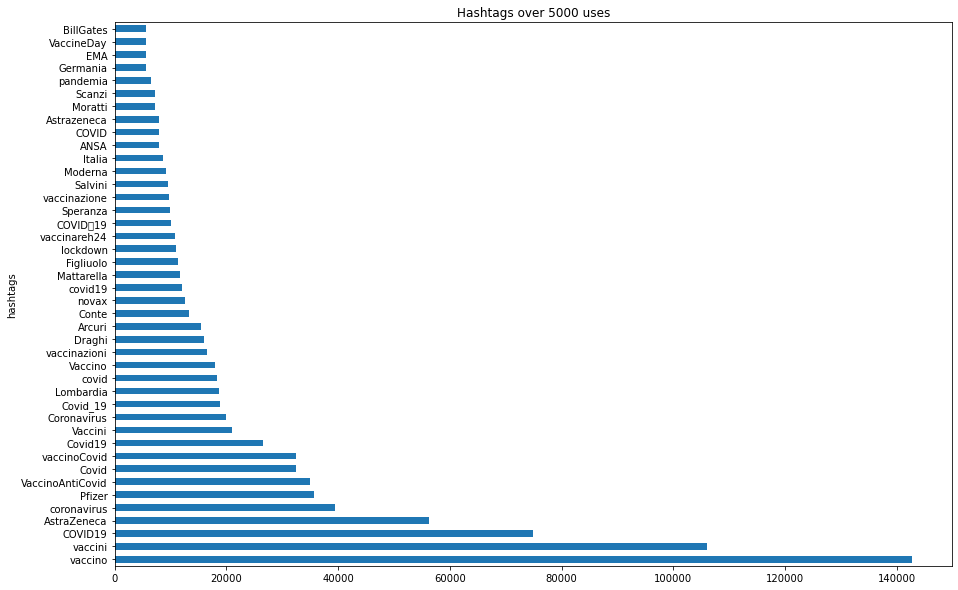

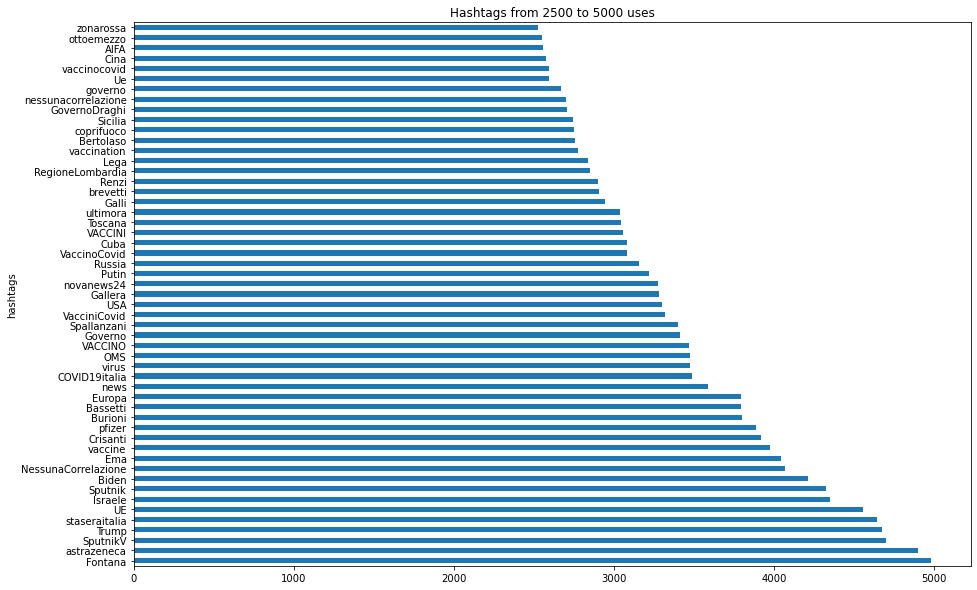

In [6]:
ut.visual_histogram(dfHashtags,5000,2500)

C:\Users\giada\anaconda3\envs\TwitterStudy\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\giada\anaconda3\envs\TwitterStudy\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


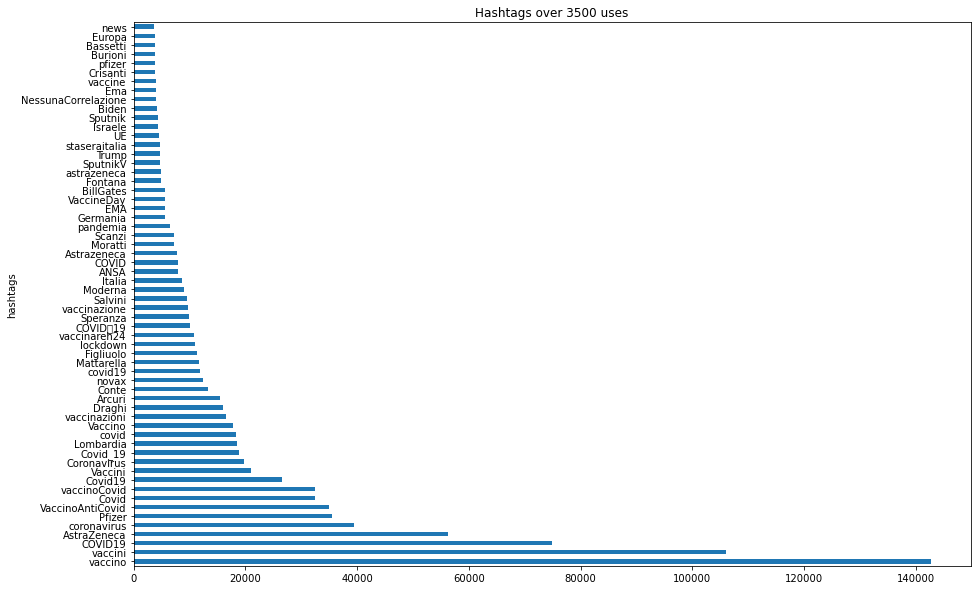

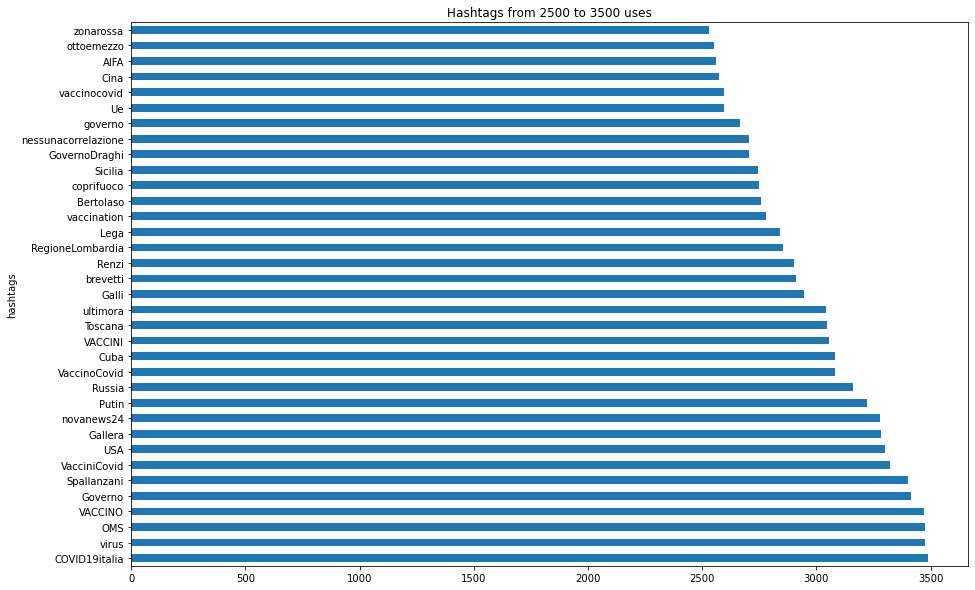

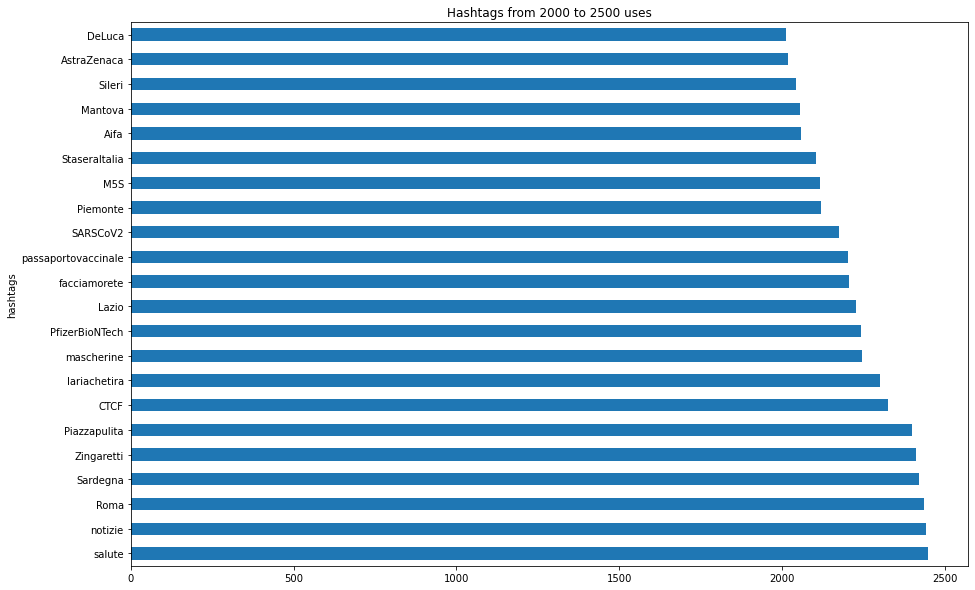

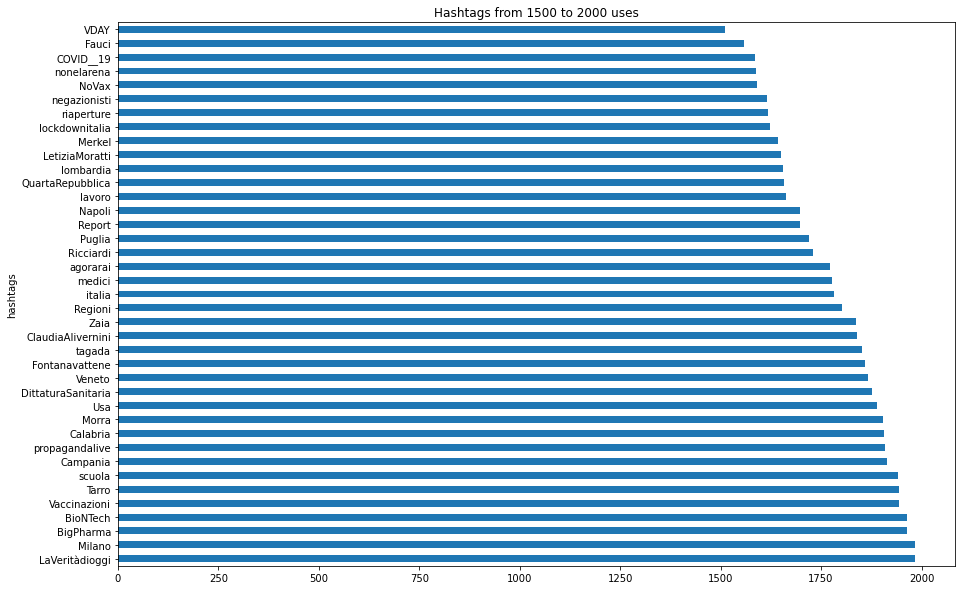

In [7]:
ut.visual_histogram(dfHashtags,3500,2500,2000,1500)

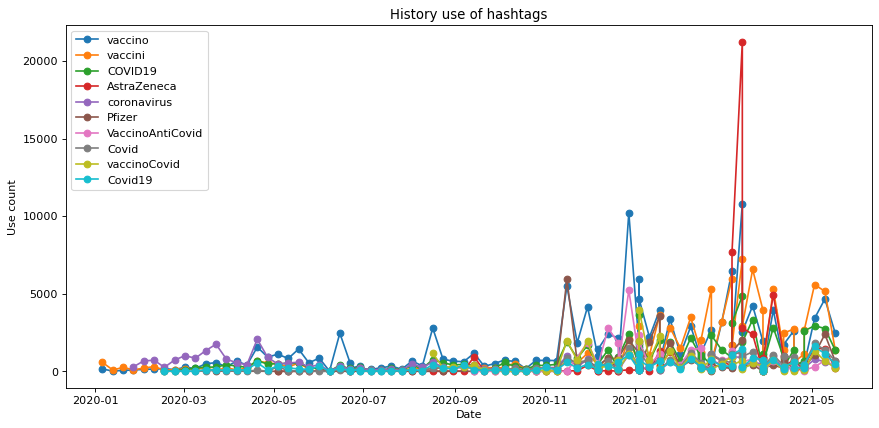

In [8]:
ut.visual_by_date_together(dfHashtags,dfUse)

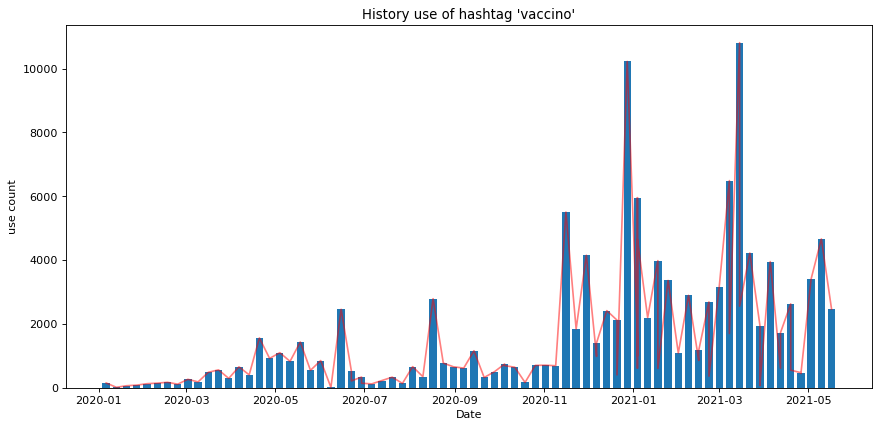

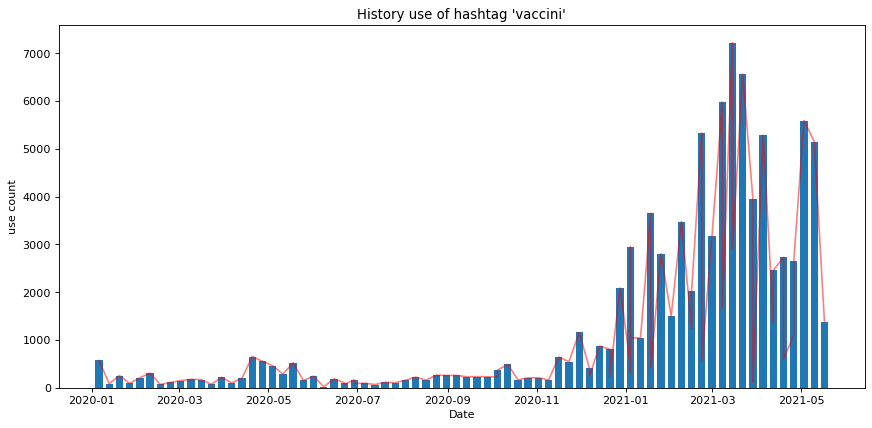

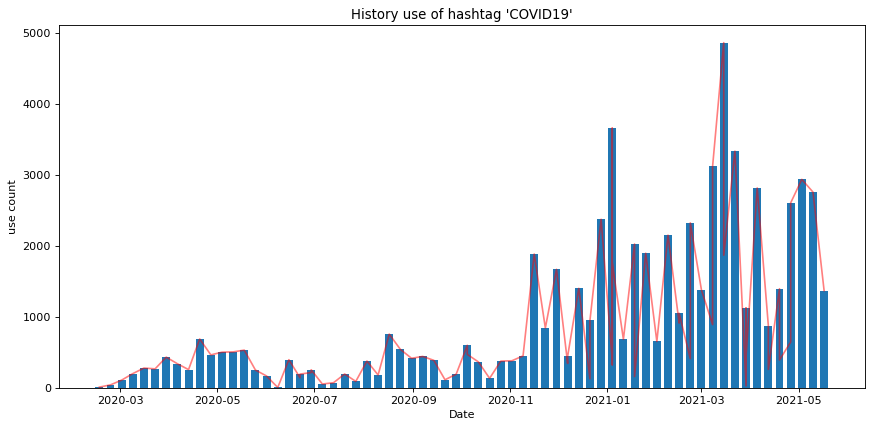

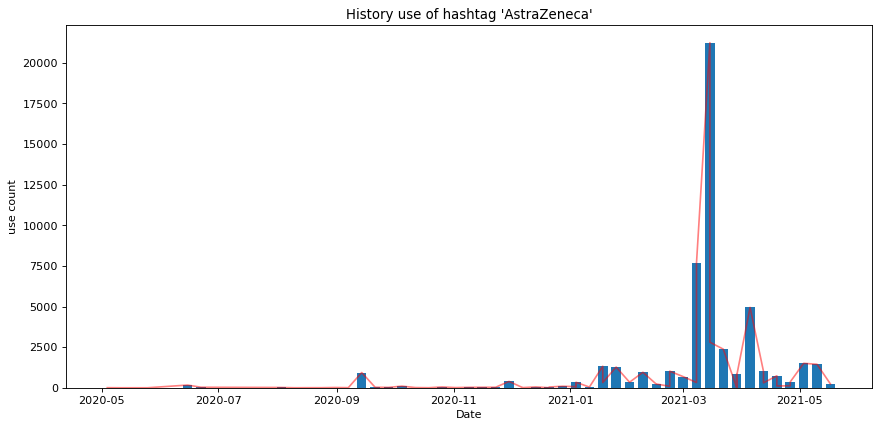

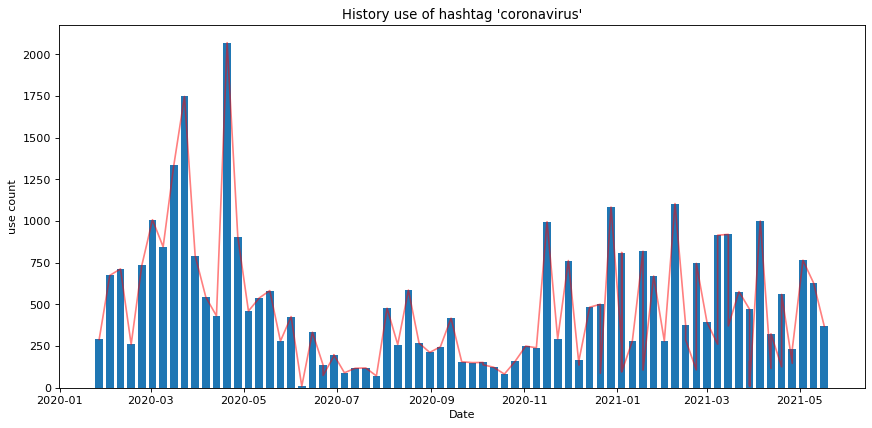

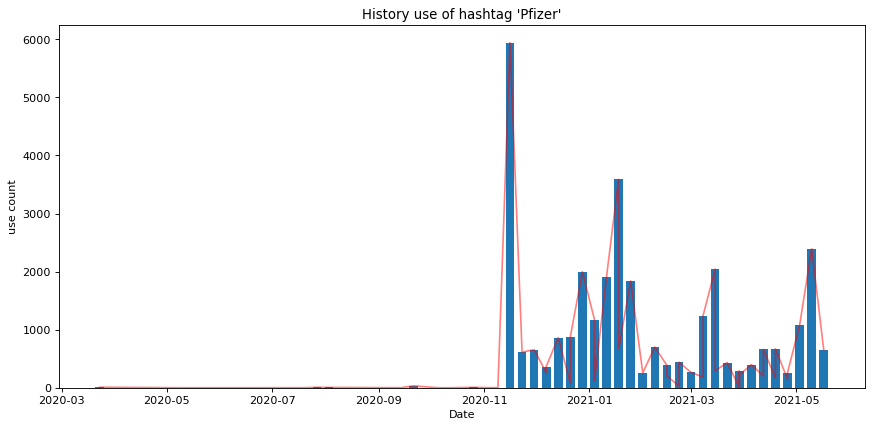

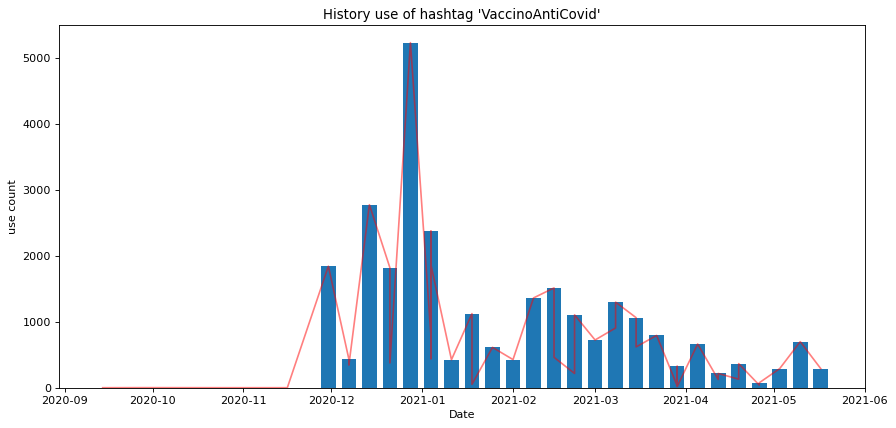

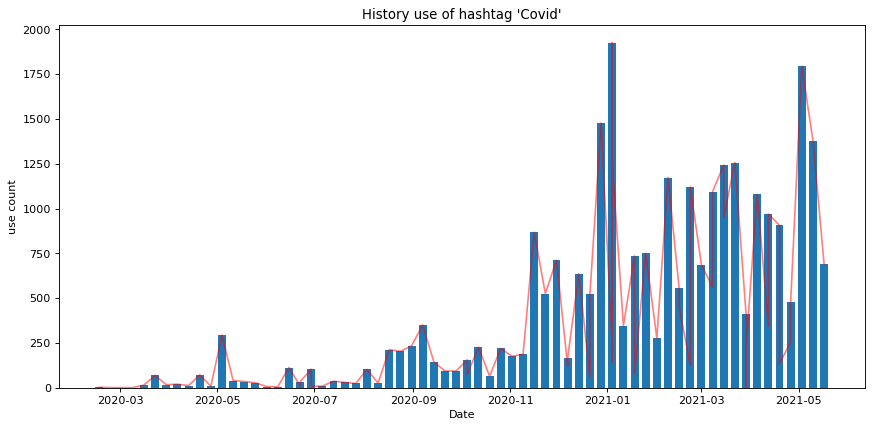

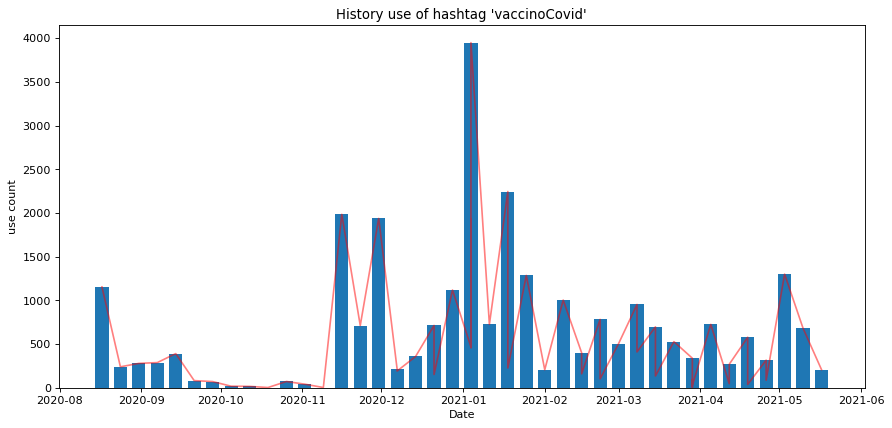

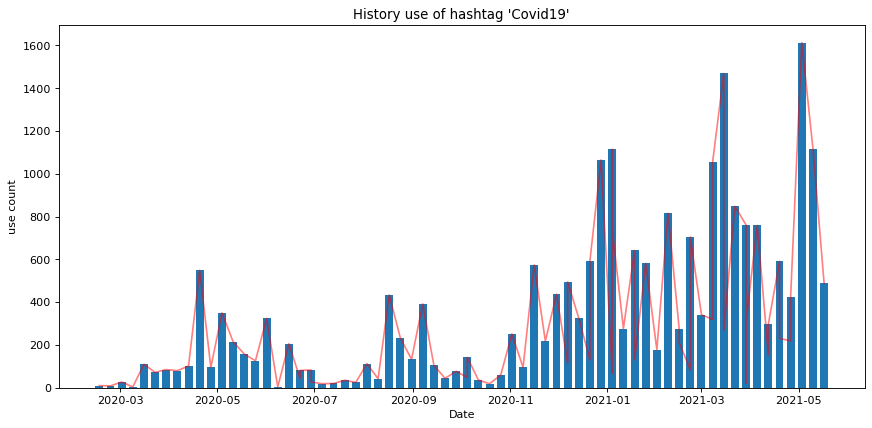

In [9]:
ut.visual_by_date_split(dfHashtags,dfUse)

## Study without some hastag

In [10]:
hastagRemove = ['vaccin.*','covid.*','corona.*','astrazeneca','pfizer','sarscov2','sputnikv','moderna','pandemia']
dfHashtagFiltered = dfHashtags
for r in hastagRemove:
    mask = dfHashtagFiltered.index.str.lower().str.match(r) == True
    dfHashtagFiltered.drop(dfHashtagFiltered[mask].index, inplace=True)

dfHashtagFiltered

,count
hashtags,
Lombardia,18582
Draghi,16003
Arcuri,15521
Conte,13384
novax,12508
...,...
Leishmaniosi,1
detta,1
Leipzig,1


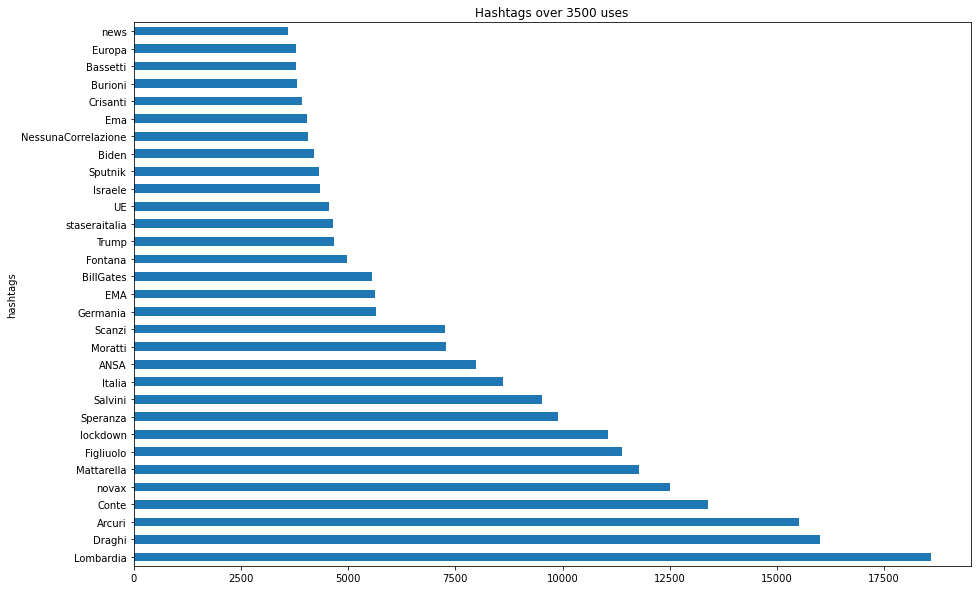

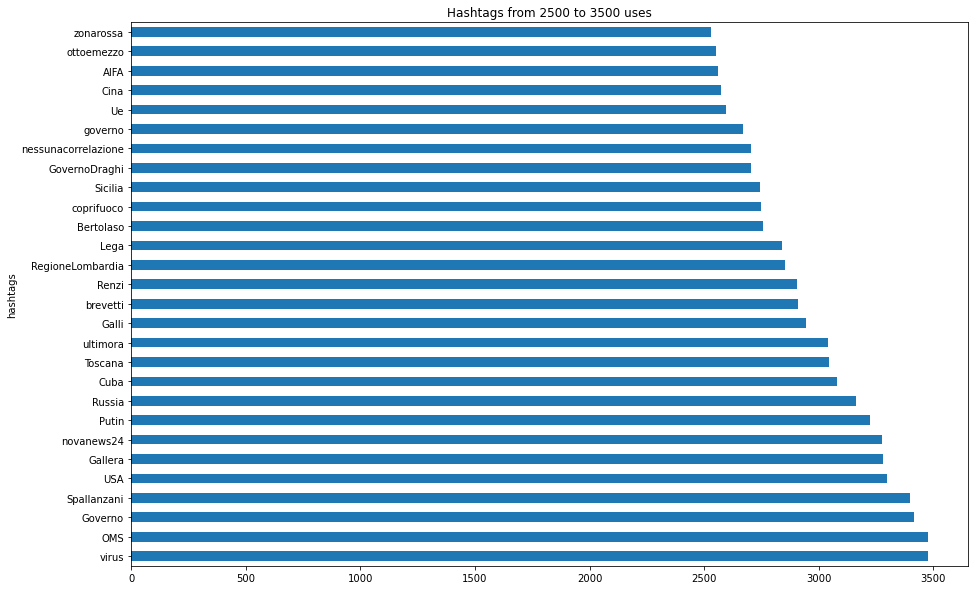

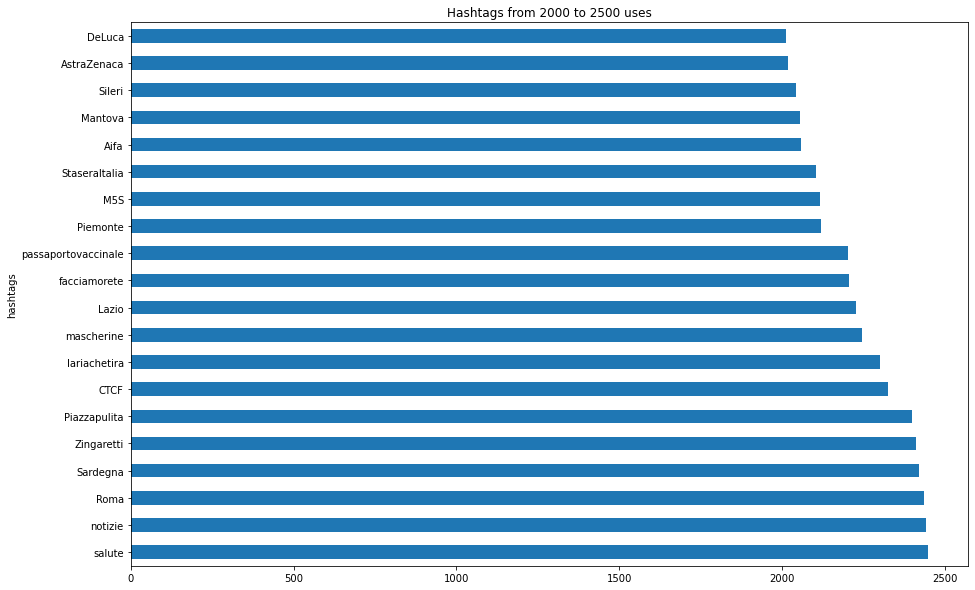

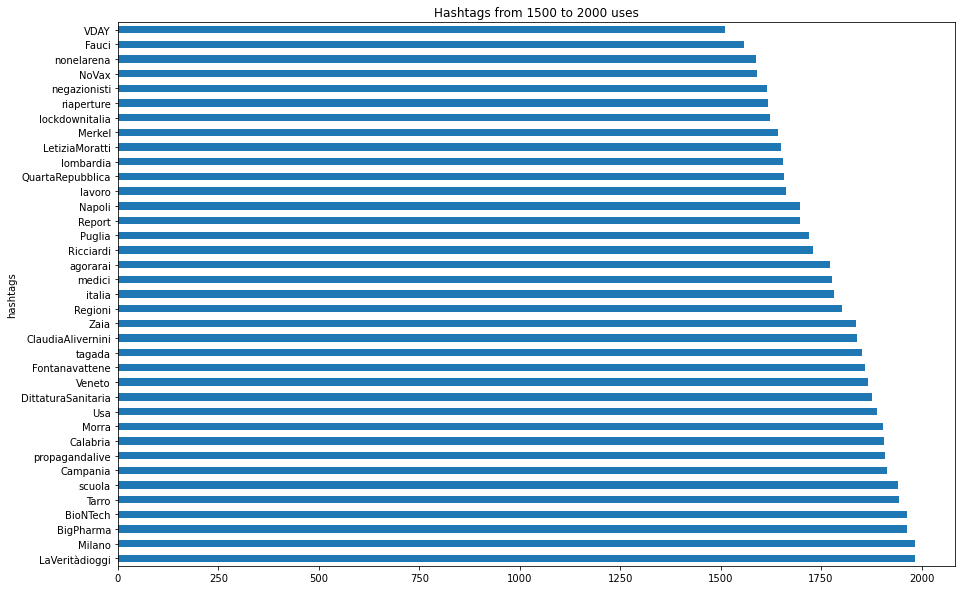

In [11]:
ut.visual_histogram(dfHashtagFiltered,3500,2500,2000,1500)

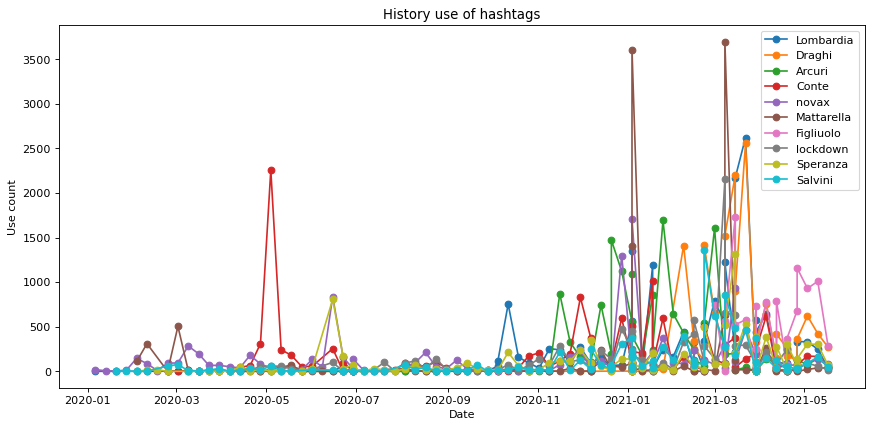

In [12]:
ut.visual_by_date_together(dfHashtagFiltered,dfUse)

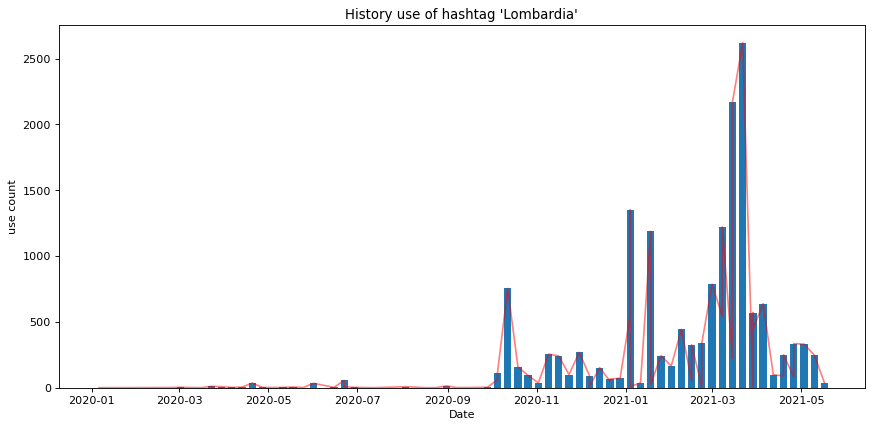

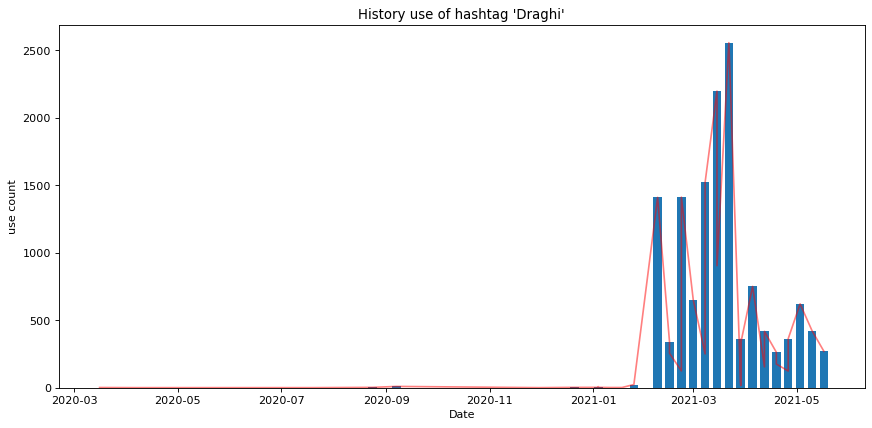

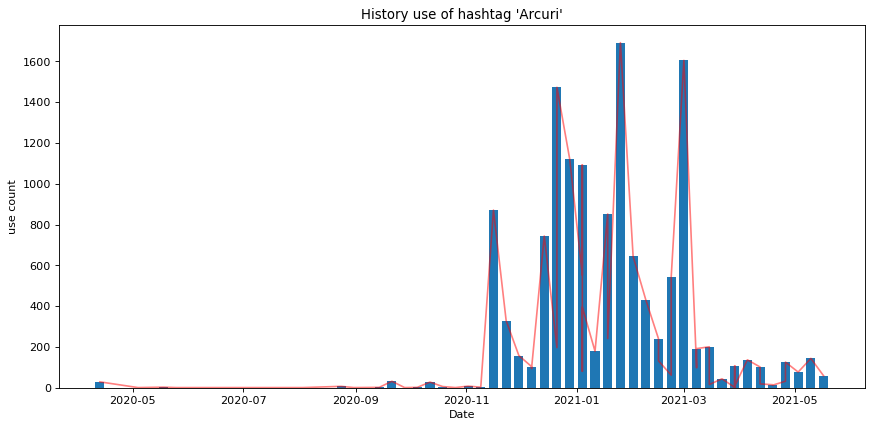

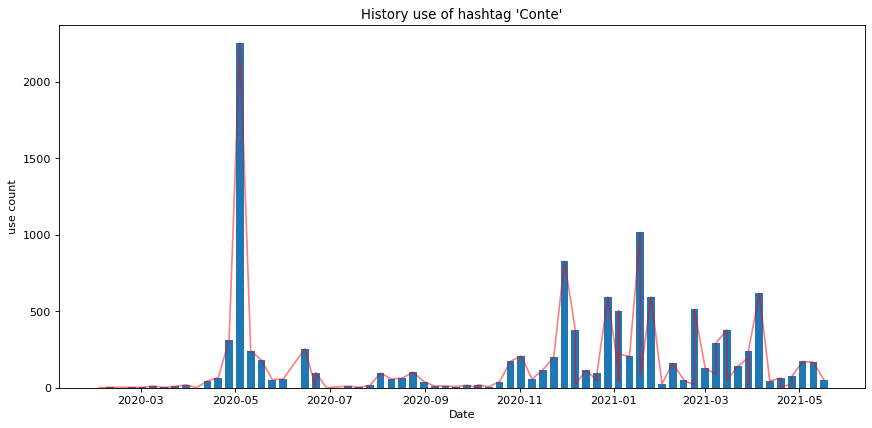

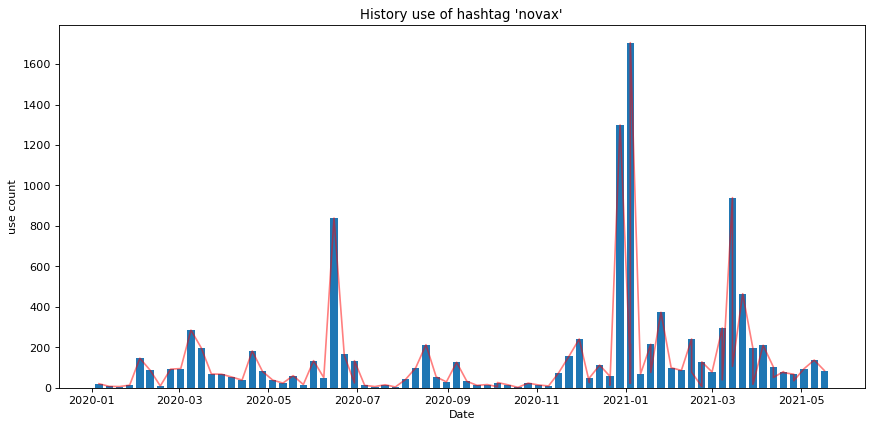

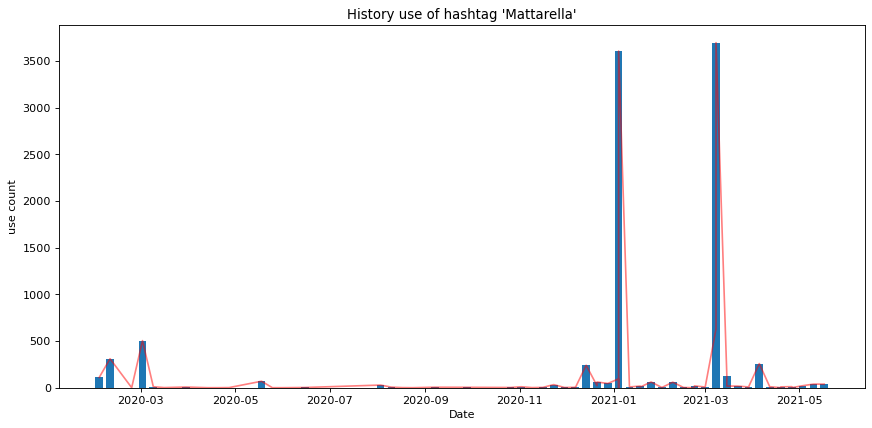

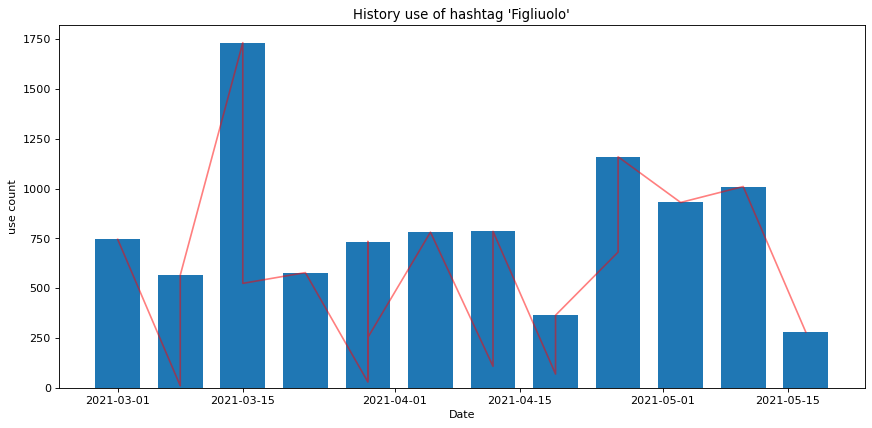

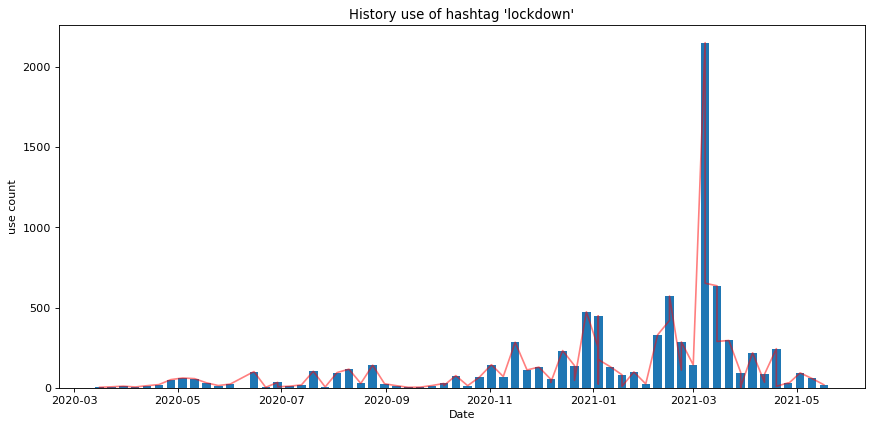

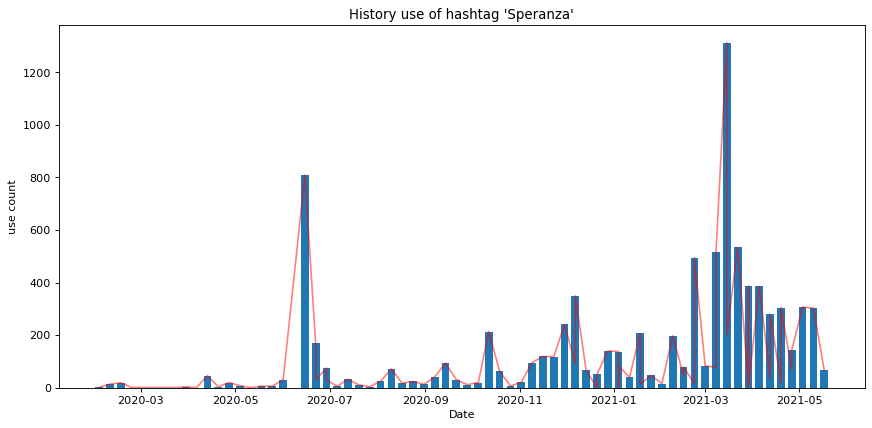

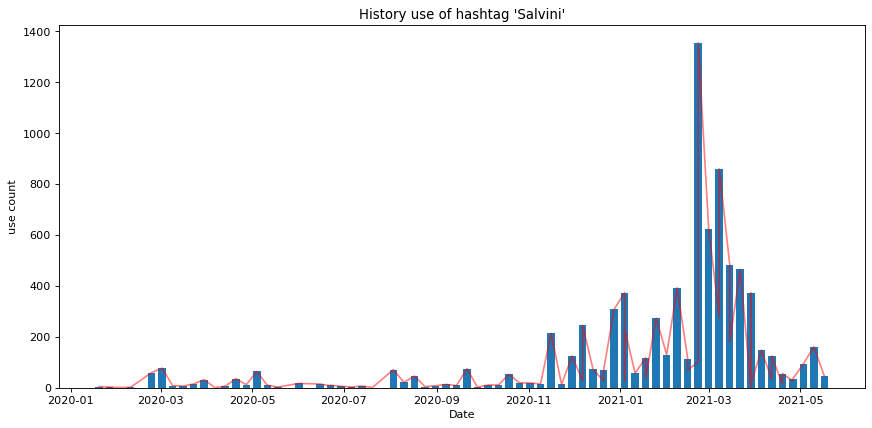

In [13]:
ut.visual_by_date_split(dfHashtagFiltered,dfUse)

## Study without some hastag and hastags about politic

In [14]:
dfMoreFiltered = dfHashtagFiltered
hastagRemove = ['.*lombardia.*','draghi','conte','m5s','mattarella','salvini','speranza','renzi','lega','.*governo.*',
           '.*moratti.*','zingaretti','scanzi','burioni','crisanti']
for r in hastagRemove:
    mask = dfMoreFiltered.index.str.lower().str.match(r) == True
    dfMoreFiltered.drop(dfMoreFiltered[mask].index, inplace=True)

dfMoreFiltered

,count
hashtags,
Arcuri,15521
novax,12508
Figliuolo,11379
lockdown,11058
Italia,8605
...,...
Leishmaniosi,1
detta,1
Leipzig,1


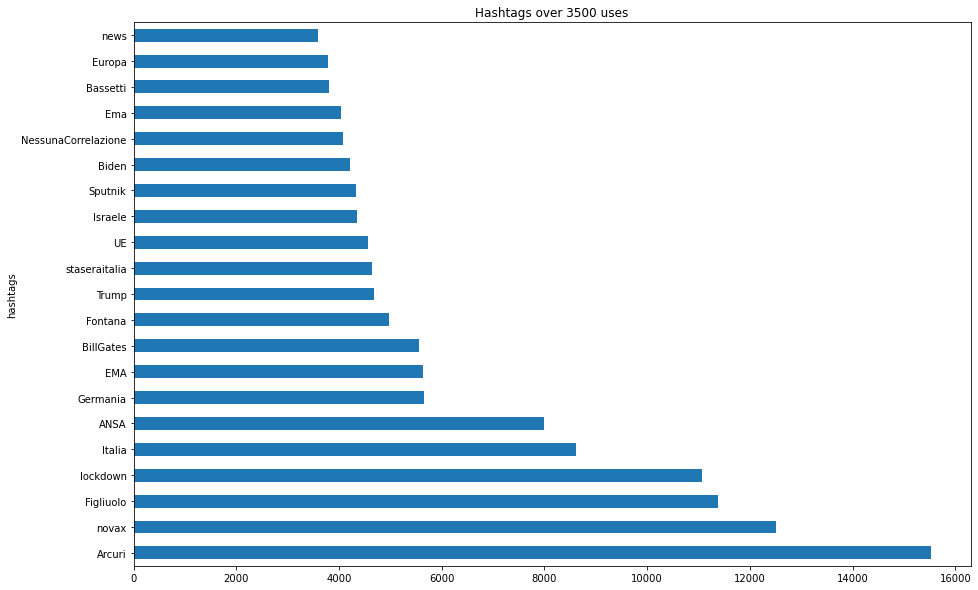

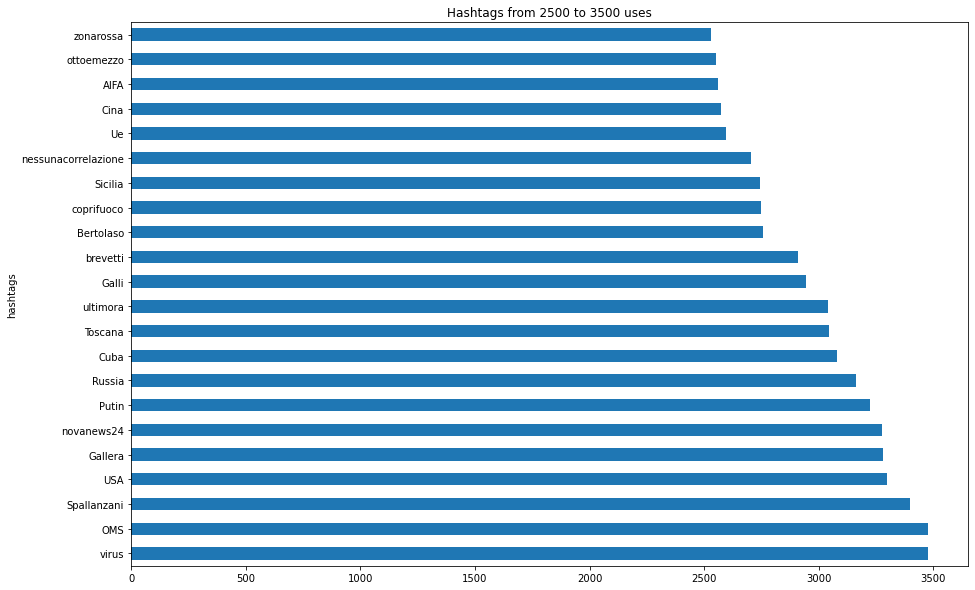

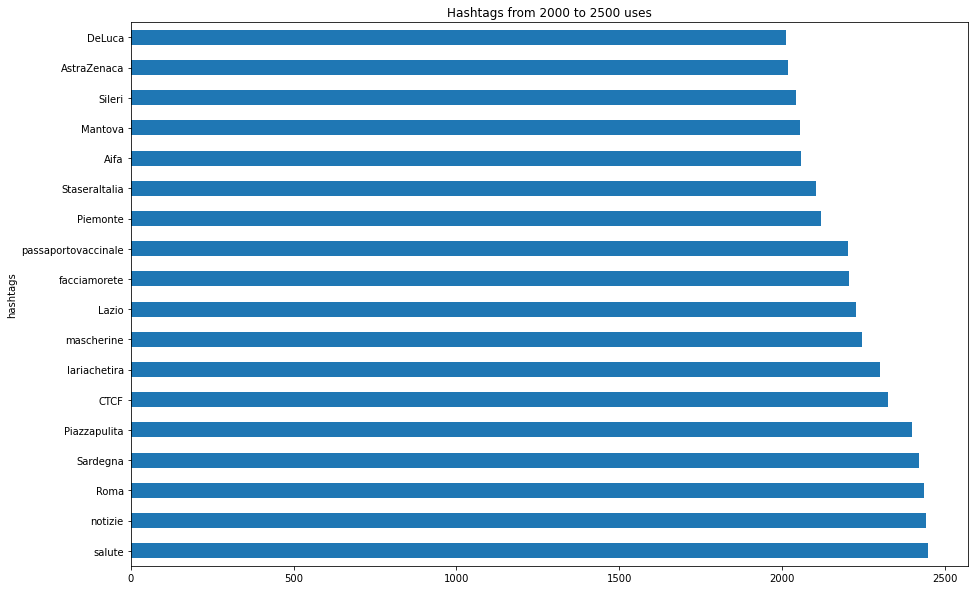

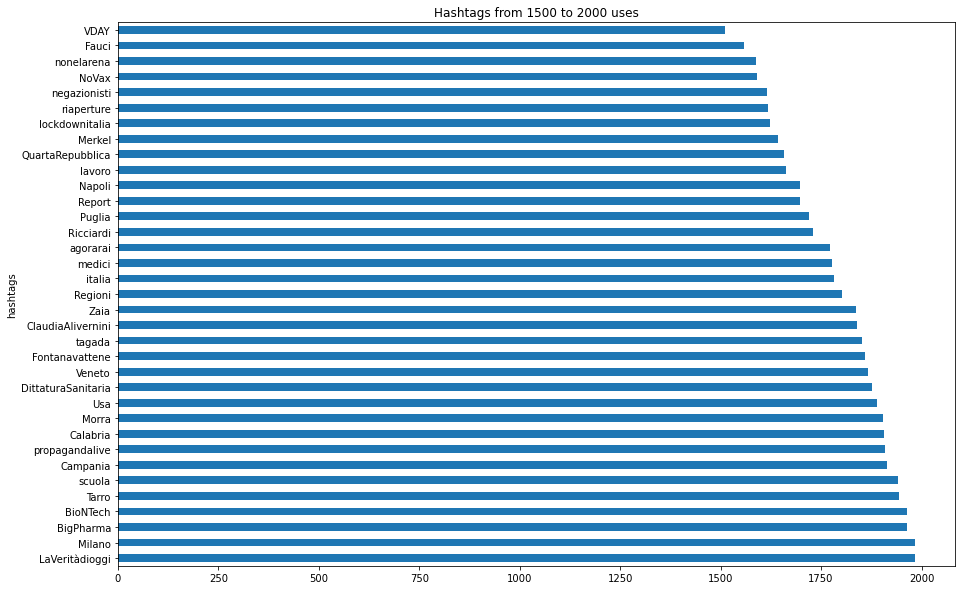

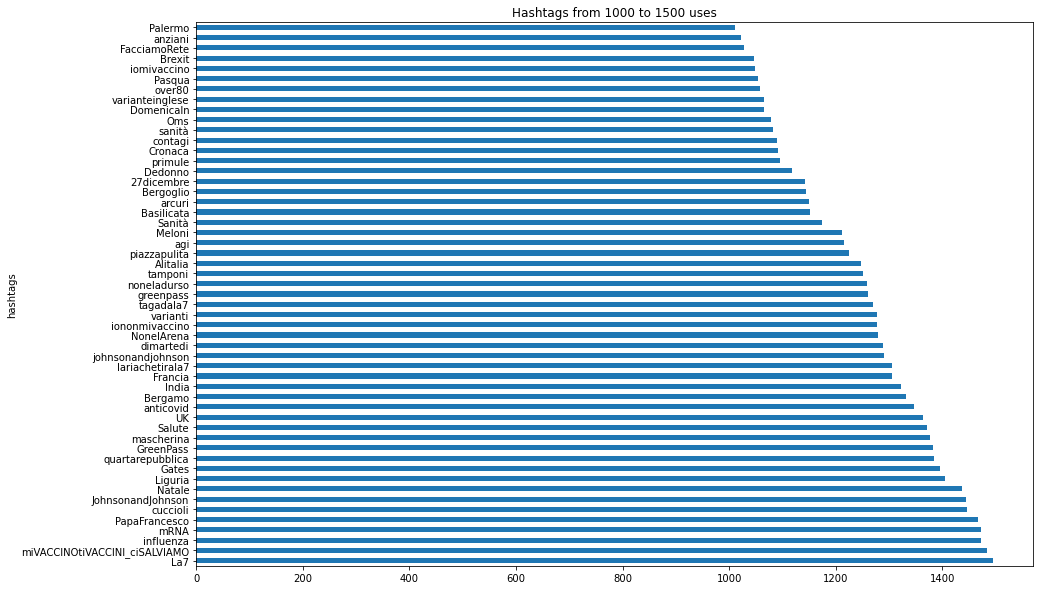

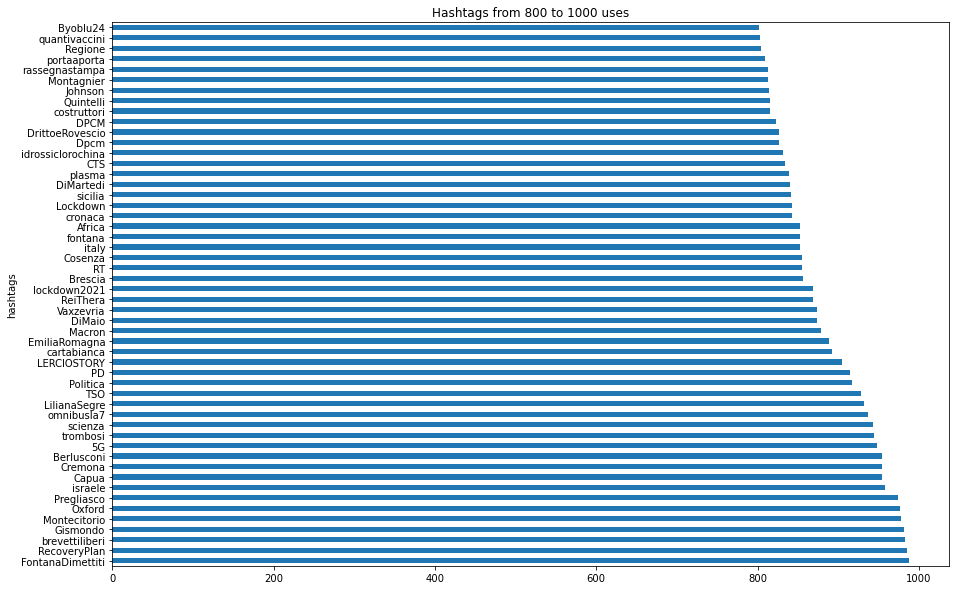

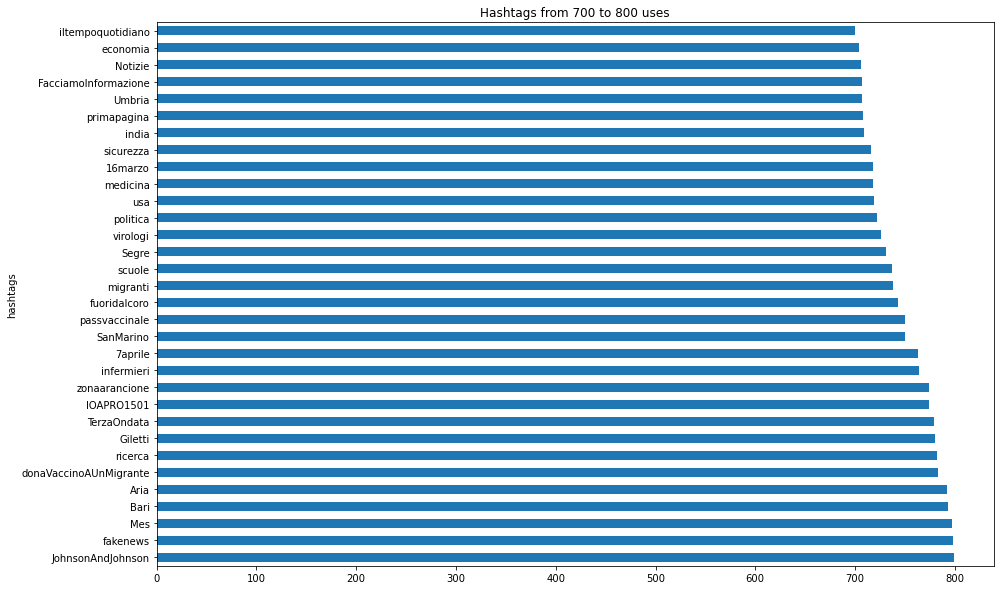

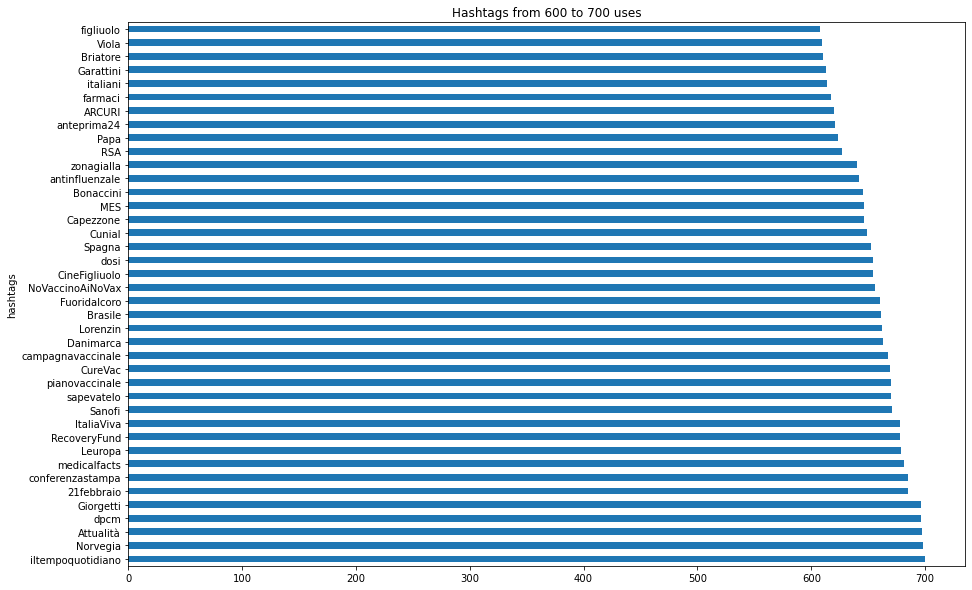

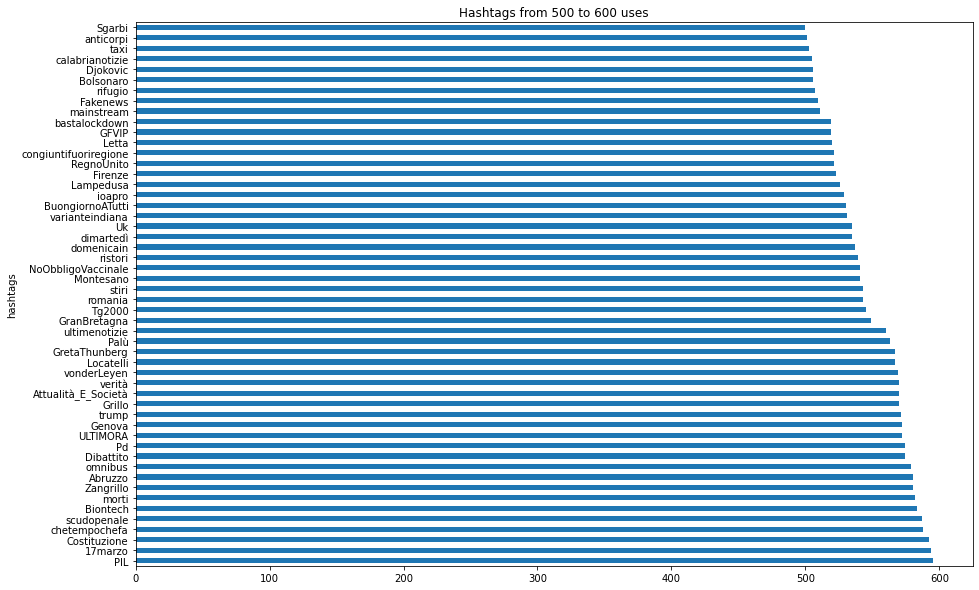

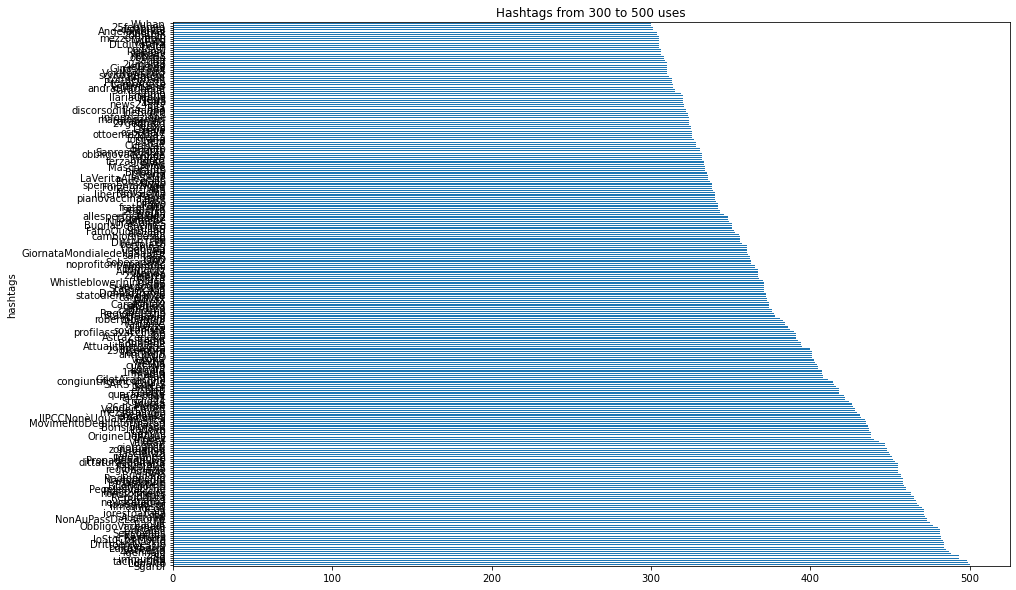

In [15]:
ut.visual_histogram(dfMoreFiltered,3500,2500,2000,1500,1000,800,700,600,500,300)

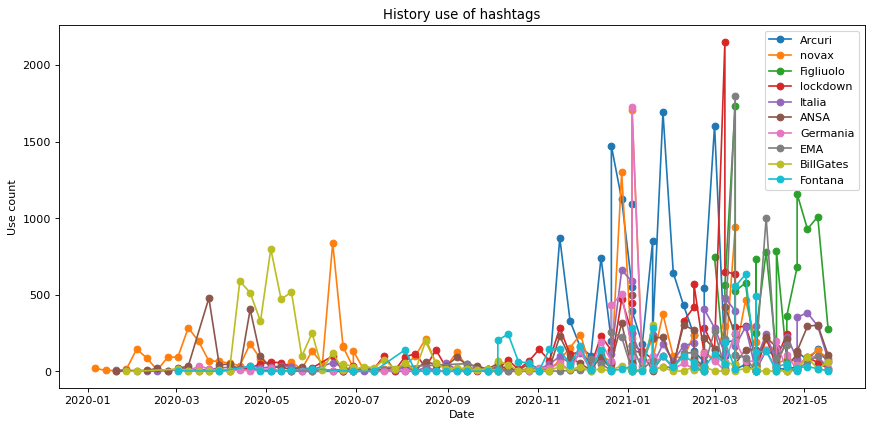

In [16]:
ut.visual_by_date_together(dfMoreFiltered,dfUse)

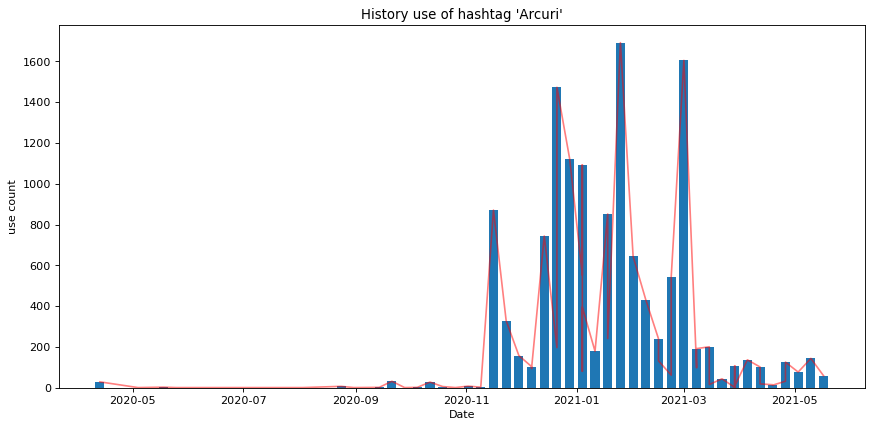

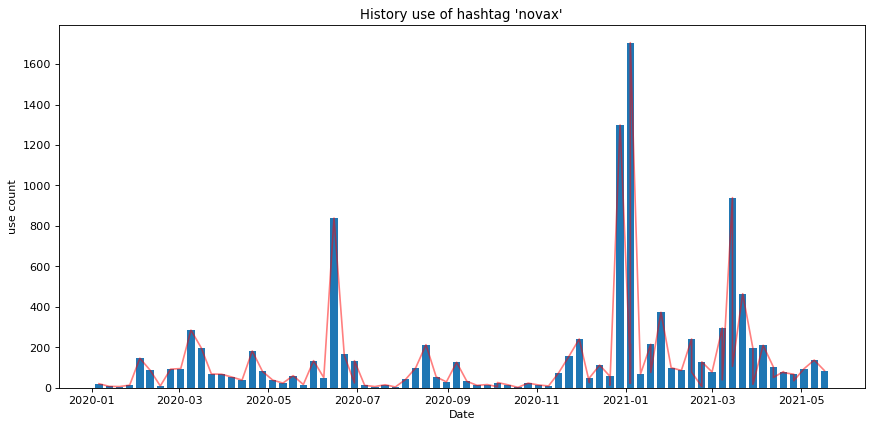

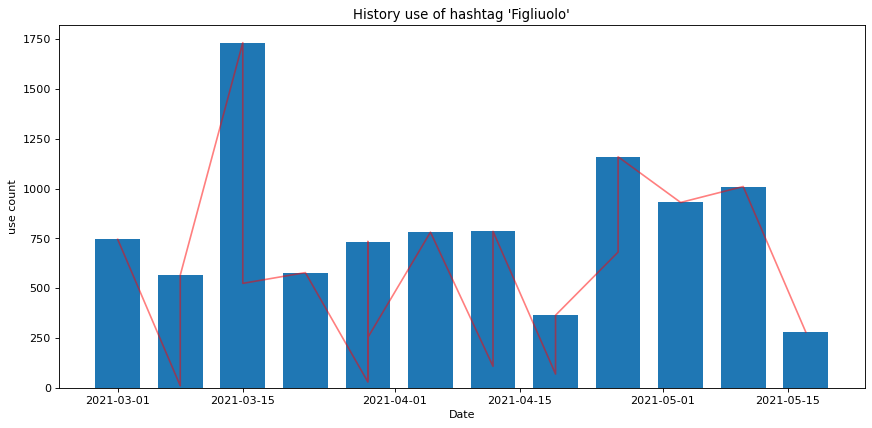

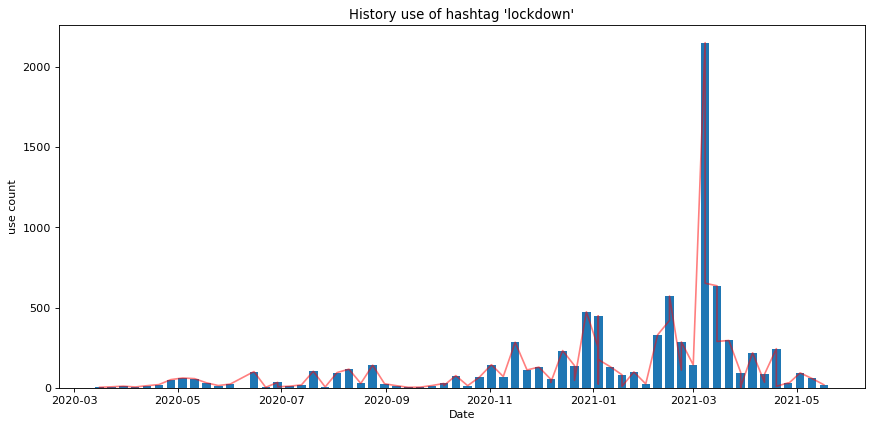

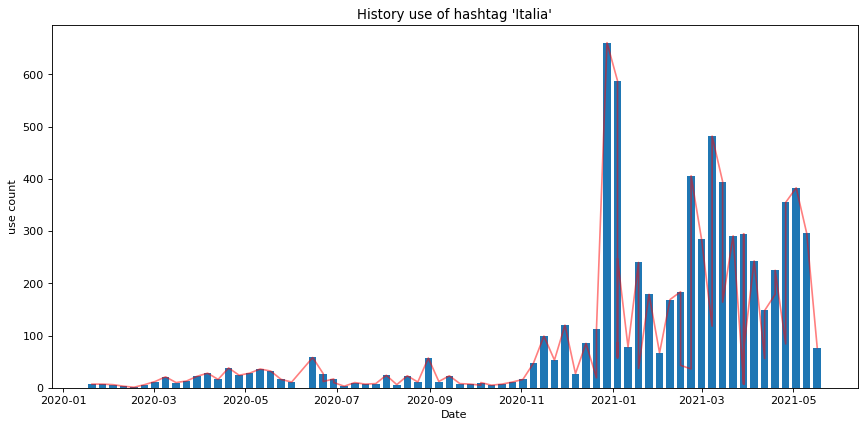

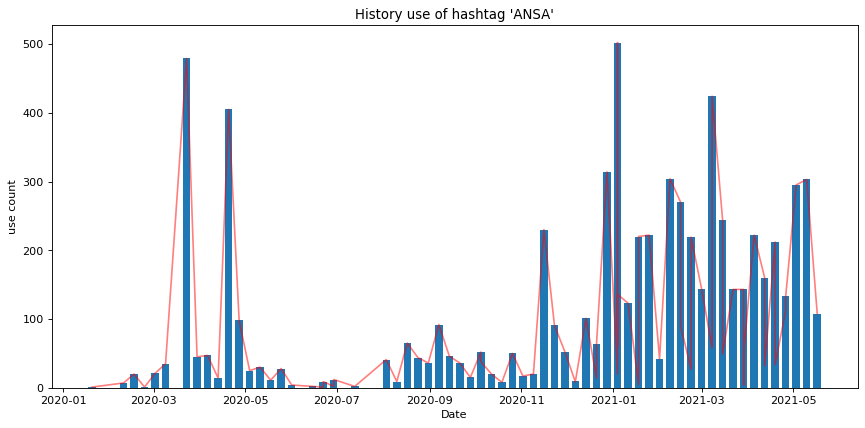

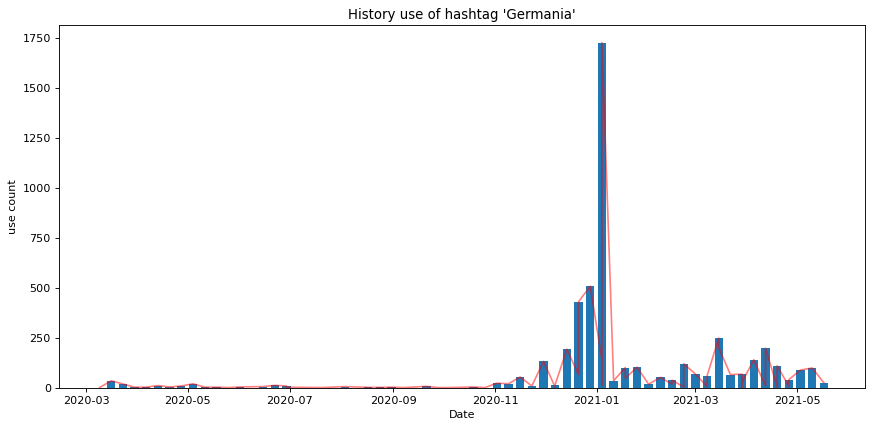

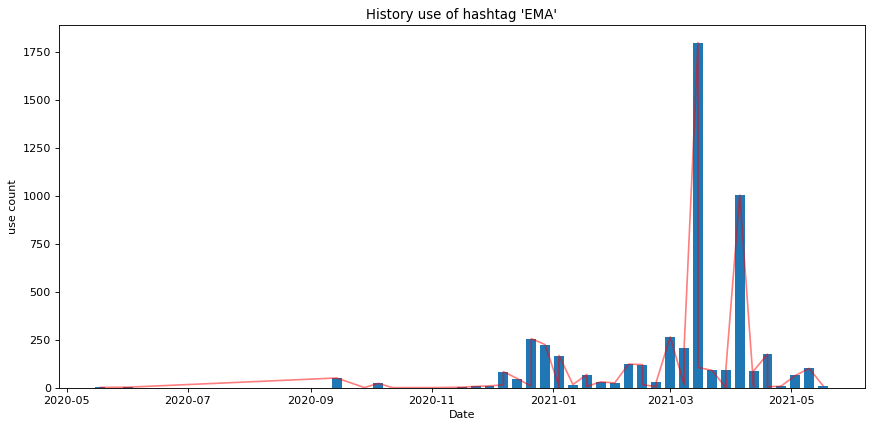

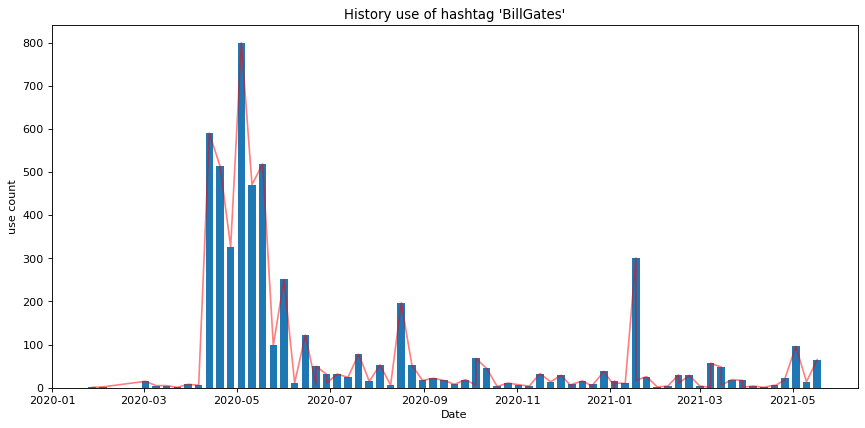

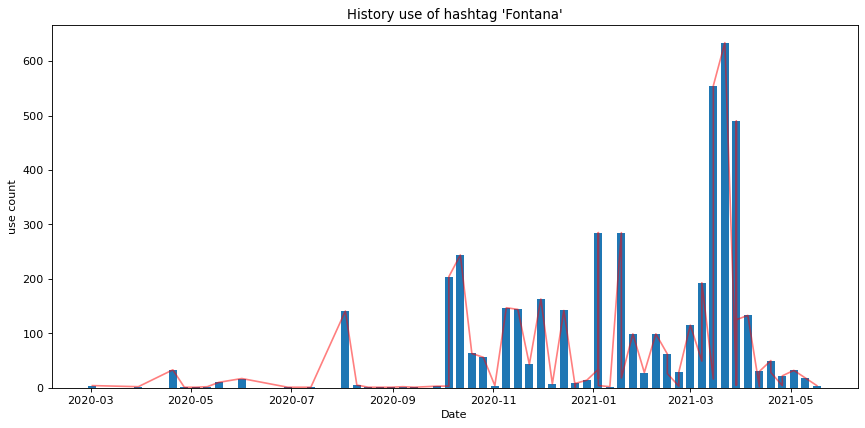

In [17]:
ut.visual_by_date_split(dfMoreFiltered,dfUse)

## Discussion about vaccine

In [18]:
dfVaccineType = pd.DataFrame()
hastagMantain = ['.*astrazeneca.*','.*pfizer.*','.*sarscov.*','.*sputnikv.*','.*moderna.*','.*jonson.*']
for r in hastagMantain:
    mask = dfHashtags.index.str.lower().str.match(r)
    dfVaccineType.loc[r,'count'] = sum(dfHashtags.loc[mask,'count'])
    dfVaccineType.loc[r,'count'] = sum(dfHashtags.loc[mask,'count'])
    dfVaccineType.loc[r,'%'] =  (dfVaccineType.loc[r,'count'] / sum(dfHashtags['count']))*100

dfVaccineType

,count,%
.*astrazeneca.*,366.0,0.032218
.*pfizer.*,135.0,0.011884
.*sarscov.*,31.0,0.002729
.*sputnikv.*,2.0,0.000176
.*moderna.*,13.0,0.001144
.*jonson.*,5.0,0.000440
